In [2]:
import numpy as np
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

folder = 'G:\\MNtissueproject_CLEANED20250716\\biexponential_simulations\\gslab_exports_meadian1filter\\'
datafiles = []
for file in glob.glob(folder +'MULTI*_pxData.csv'):
    datafiles.append(file)
#print(datafiles)

df = pd.DataFrame()
for f in datafiles:
    name = os.path.basename(f).split('_')
    #print(name)

    dataG = pd.read_csv(f, usecols=['G']).values
    dataS = pd.read_csv(f,usecols = ['S']).values

    cvG = np.std(dataG)/np.mean(dataG)
    cvS = np.std(dataS)/np.mean(dataS)

    if "np" not in f:
        photons = 10000
        #print(name)
        newrow = {"t1": name[3],"t2":name[5],"a1":name[7],"a2":name[9],"cvG":cvG,"cvS":cvS,"photons":photons, "dataG":dataG, "dataS":dataS}
    elif "np" in f:
        photons = (name[3])
        newrow = {"t1": name[5],"t2":name[7],"a1":name[9],"a2":name[11],"cvG":cvG,"cvS":cvS,"photons":photons,"dataG":dataG, "dataS":dataS}
    else:
        photons = 0
    
    
    df = df._append(newrow,ignore_index=True)



       t1    t2   a1   a2       cvG       cvS photons  \
520   8.0   2.0  0.5  0.5  0.343860  0.220056      50   
524   8.0  1.26  0.5  0.5  0.233164  0.215194      50   
530   8.0   0.5  0.5  0.5  0.171656  0.307926      50   
534   8.0  0.79  0.5  0.5  0.187342  0.249617      50   
539  7.13   2.0  0.5  0.5  0.331508  0.205544      50   
548  7.13  1.26  0.5  0.5  0.226348  0.208415      50   
552  7.13   0.5  0.5  0.5  0.175033  0.293581      50   
557  7.13  0.79  0.5  0.5  0.187275  0.232561      50   
561  6.35   2.0  0.5  0.5  0.315072  0.208129      50   
566  6.35  0.79  0.5  0.5  0.183882  0.227289      50   
570  6.35  1.26  0.5  0.5  0.221539  0.195718      50   
575  6.35   0.5  0.5  0.5  0.168500  0.267804      50   
584  5.66   2.0  0.5  0.5  0.310314  0.189714      50   
587  5.66  0.79  0.5  0.5  0.186242  0.207203      50   
592  5.66  1.26  0.5  0.5  0.212108  0.182683      50   
596  5.66   0.5  0.5  0.5  0.171343  0.245009      50   
601  5.04  1.26  0.5  0.5  0.20

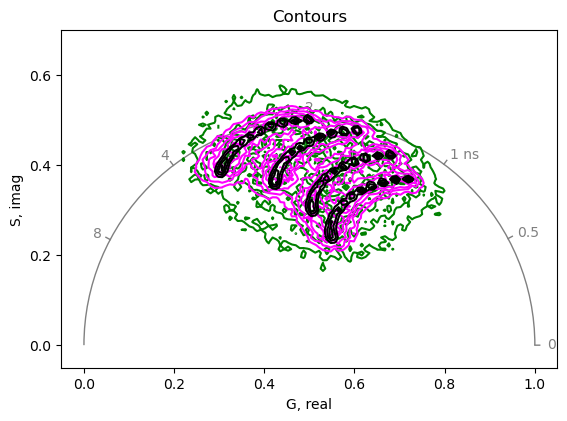

In [3]:
from phasorpy.plot import PhasorPlot
from matplotlib.colors import ListedColormap

a1a2equal = df[df['a1']=='0.5']
a1a2equal = a1a2equal[a1a2equal['a2']=='0.5']

int50 = a1a2equal[a1a2equal['photons']=='50']
int500 = a1a2equal[a1a2equal['photons']=='500']
int10k = a1a2equal[a1a2equal['photons']==10000]

int50g = int50.loc[:,'dataG'].explode().to_numpy()
int50s = int50.loc[:,'dataS'].explode().to_numpy()
int500g = int500.loc[:,'dataG'].explode().to_numpy()
int500s = int500.loc[:,'dataS'].explode().to_numpy()
int10kg = int10k.loc[:,'dataG'].explode().to_numpy()
int10ks = int10k.loc[:,'dataS'].explode().to_numpy()


print(int50)

green_cmap = ListedColormap(['green'])
red_cmap = ListedColormap(['magenta'])
black_cmap = ListedColormap(['black'])
print(int500.loc[:,'dataG'].explode().to_numpy())
plot = PhasorPlot(frequency=80.0, title='Contours')
plot.contour(int50g,int50s, cmap=green_cmap,alpha=1)
plot.contour(int500g,int500s,cmap=red_cmap,alpha=1)
plot.contour(int10kg,int10ks,cmap=black_cmap,alpha=1)



plot.show()

[array([0.064685]) array([0.08619346]) array([0.04343103]) ...
 array([0.4716834]) array([0.51522795]) array([0.45552079])]


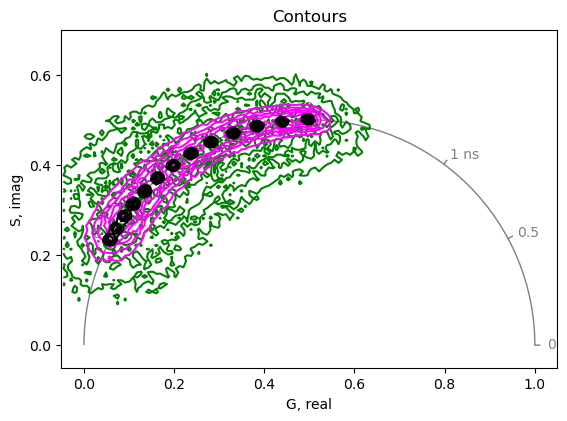

In [83]:
from phasorpy.plot import PhasorPlot
from matplotlib.colors import ListedColormap

a1a2equal = df[df['a1']=='1.0']
a1a2equal = a1a2equal[a1a2equal['a2']=='0.0']

int50 = a1a2equal[a1a2equal['photons']=='50']
int500 = a1a2equal[a1a2equal['photons']=='500']
int10k = a1a2equal[a1a2equal['photons']==10000]

int50g = int50.loc[:,'dataG'].explode().to_numpy()
int50s = int50.loc[:,'dataS'].explode().to_numpy()
int500g = int500.loc[:,'dataG'].explode().to_numpy()
int500s = int500.loc[:,'dataS'].explode().to_numpy()
int10kg = int10k.loc[:,'dataG'].explode().to_numpy()
int10ks = int10k.loc[:,'dataS'].explode().to_numpy()


#print(a1a2equal)

green_cmap = ListedColormap(['green'])
red_cmap = ListedColormap(['magenta'])
black_cmap = ListedColormap(['black'])
print(int500.loc[:,'dataG'].explode().to_numpy())
plot = PhasorPlot(frequency=80.0, title='Contours')
plot.contour(int50g,int50s, cmap=green_cmap,alpha=1)
plot.contour(int500g,int500s,cmap=red_cmap,alpha=1)
plot.contour(int10kg,int10ks,cmap=black_cmap,alpha=1)



plot.show()

                    t1   t2    a1    a2       cvG       cvS photons  \
13   7.999999999999999  0.5   1.0   0.0  0.139526  0.031978   10000   
16   7.999999999999999  0.5   0.5   0.5  0.012696  0.021254   10000   
17   7.999999999999999  0.5  0.25  0.75  0.006520  0.015399   10000   
18   7.999999999999999  0.5  0.75  0.25  0.023840  0.025619   10000   
21   7.999999999999999  0.5   0.0   1.0  0.001311  0.009007   10000   
..                 ...  ...   ...   ...       ...       ...     ...   
253                2.0  0.5   1.0   0.0  0.012034  0.007717   10000   
256                2.0  0.5   0.5   0.5  0.006729  0.009120   10000   
257                2.0  0.5  0.25  0.75  0.004372  0.009404   10000   
258                2.0  0.5  0.75  0.25  0.009063  0.008696   10000   
259                2.0  0.5   0.0   1.0  0.001303  0.009040   10000   

                                                 dataG  \
13   [[0.0646898036674996], [0.0778936286066646], [...   
16   [[0.546411485256691], [0.5

C:\Users\hwilson23\AppData\Local\Temp\ipykernel_45084\2709306905.py:89: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


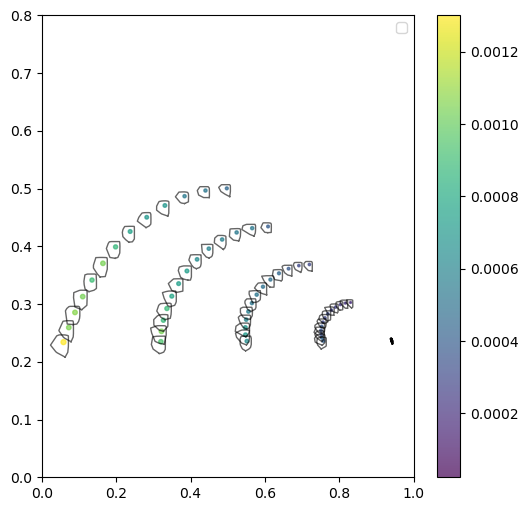

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint
from shapely.ops import unary_union

# --- filter datasets ---
#a1a2equal = df[(df['a1'] == '0.5') & (df['a2'] == '0.5')& (df['t2']=='0.5')]
a1a2equal = df[(df['t2']=='0.5')]
int50  = a1a2equal[a1a2equal['photons'] == '50']
int500 = a1a2equal[a1a2equal['photons'] == '500']
int10k = a1a2equal[a1a2equal['photons'] == 10000]
print(int10k)


# --- helper: convex hull per row ---
def convex_hulls(df_subset):
    hulls = []
    gmeans = []
    smeans = []
    for i in df_subset.index:
        g = np.concatenate(df_subset.loc[i, 'dataG'])
        s = np.concatenate(df_subset.loc[i, 'dataS'])
                
        gmeans.append(np.mean(g))
        smeans.append(np.mean(s))
        pts = np.column_stack((g, s))
        gpct = np.percentile(g,95)
        spct = np.percentile(s,95)
        pts = pts[(pts[:,0]<gpct) & (pts[:,1]<spct)]
        if len(pts) > 2:
            hulls.append(MultiPoint(pts).convex_hull)
    return [h for h in hulls if h is not None], gmeans,smeans


# --- overlap computation (group vs group, unions) ---
def compute_group_overlap(hullsA, hullsB):
    if not hullsA or not hullsB:
        return 0, 0, 0
    unionA = unary_union(hullsA)
    unionB = unary_union(hullsB)
    inter  = unionA.intersection(unionB)
    union  = unionA.union(unionB)
    iou    = inter.area / union.area if union.area > 0 else 0
    return inter.area, union.area, iou


# --- build hulls per group ---
hulls50, gmean50,smean50  = convex_hulls(int50)
hulls500,gmean500,smean500 = convex_hulls(int500)
hulls10k,gmean10k,smean10k = convex_hulls(int10k)


# --- example overlaps ---
iarea, uarea, iou = compute_group_overlap(hulls50, hulls500)
print(f"50 vs 500 -> Overlap area: {iarea:.4f}, IoU: {iou:.4f}")

iarea, uarea, iou = compute_group_overlap(hulls50, hulls10k)
print(f"50 vs 10k -> Overlap area: {iarea:.4f}, IoU: {iou:.4f}")

iarea, uarea, iou = compute_group_overlap(hulls500, hulls10k)
print(f"500 vs 10k -> Overlap area: {iarea:.4f}, IoU: {iou:.4f}")


# --- optional visualization ---
plt.figure(figsize=(6,6))
all_x, all_y, all_sizes, all_colors = [], [], [], []
for hulls, color, label,gmean,smean in [#(hulls50, "green", "50",gmean50,smean50),
                            #(hulls500, "magenta", "500",gmean500,smean500),
                            (hulls10k, "black", "10k",gmean10k,smean10k)
                            ]:
    i = -1
    for hull in hulls:
        i+=1

        x,y = hull.exterior.xy
        plt.plot(x, y, color=color, linewidth=1, alpha=0.6)
        all_x.append(gmean[i])
        all_y.append(smean[i])
        all_sizes.append(hull.area*10000)
        all_colors.append(hull.area)
        #plt.scatter(gmean[i],smean[i], s=[(hull.area)*10000],alpha = 0.7,c=[(hull.area)*10000], cmap= 'viridis')
        print(f'{i} is {(hull.area)*10000}')
plt.scatter(all_x, all_y, s=all_sizes, c=all_colors, cmap="viridis", alpha=0.7)        
plt.colorbar()


plt.xlim([0,1])
plt.ylim([0,0.8])
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

# --- helper: convex hull per row ---
def convex_hulls(df_subset, group_label):
    hulls = []
    for i in df_subset.index:
        g = np.concatenate(df_subset.loc[i, 'dataG'])
        s = np.concatenate(df_subset.loc[i, 'dataS'])
        gpct = np.percentile(g,95)
        spct = np.percentile(s,95)
        pts = np.column_stack((g, s))
        pts = pts[(pts[:,0]<gpct) & (pts[:,1]<spct)]
        if len(pts) > 2:
            hulls.append((group_label, i, MultiPoint(pts).convex_hull))
    return hulls

# --- overlap computation (pairwise) ---
def compute_pairwise_overlaps(hullsA, hullsB, allow_self=False):
    results = []
    for groupA, idxA, hullA in hullsA:
        for groupB, idxB, hullB in hullsB:
            # avoid duplicate self-comparisons unless allow_self=True
            if not allow_self and (groupA == groupB and idxA == idxB):
                continue
            if hullA.is_valid and hullB.is_valid:
                inter = hullA.intersection(hullB)
                union = hullA.union(hullB)
                iou   = inter.area / union.area if union.area > 0 else 0
                results.append({
                    "GroupA": groupA,
                    "IndexA": idxA,
                    "GroupB": groupB,
                    "IndexB": idxB,
                    "IntersectionArea": inter.area,
                    "UnionArea": union.area,
                    "IoU": iou
                })
    return results


# --- build hulls per group ---
hulls50  = convex_hulls(int50)
hulls500 = convex_hulls(int500)
hulls10k = convex_hulls(int10k)

# --- compute overlaps ---
results = []
# between groups
results += compute_pairwise_overlaps(hulls50, hulls500)
results += compute_pairwise_overlaps(hulls50, hulls10k)
results += compute_pairwise_overlaps(hulls500, hulls10k)
# within groups
results += compute_pairwise_overlaps(hulls50, hulls50)
results += compute_pairwise_overlaps(hulls500, hulls500)
results += compute_pairwise_overlaps(hulls10k, hulls10k)

# --- make into a DataFrame ---
df_overlaps = pd.DataFrame(results)


# Preview first few rows
print(df_overlaps[df_overlaps['IntersectionArea']<0.5])

# Optional: save to CSV
#df_overlaps.to_csv("pairwise_overlaps_all.csv", index=False)


TypeError: convex_hulls() missing 1 required positional argument: 'group_label'

In [ ]:
# --- build hulls per group ---
# Keep only the rows that do NOT overlap significantly
threshold = 0.8


bad_idx_per_group = {}

for group in ["50","500","10k"]:
    group_str = str(group)  # make sure type matches your DF
    # select only overlaps within this group
    within_group = df_overlaps[
        (df_overlaps["GroupA"]==group_str) & (df_overlaps["GroupB"]==group_str)
    ]
    # any row where IoU > threshold => mark both indices as "bad"
    bad_indices = set(within_group.loc[within_group["IoU"] > threshold, "IndexA"]).union(
                  set(within_group.loc[within_group["IoU"] > threshold, "IndexB"]))
    bad_idx_per_group[group] = bad_indices

# Now filter the original DataFrames
int50_filtered  = int50.drop(index=bad_idx_per_group["50"], errors="ignore")
int500_filtered = int500.drop(index=bad_idx_per_group["500"], errors="ignore")
int10k_filtered = int10k.drop(index=bad_idx_per_group["10k"], errors="ignore")





hulls50  = convex_hulls(int50_filtered, "50")
hulls500 = convex_hulls(int500_filtered, "500")
hulls10k = convex_hulls(int10k_filtered, "10k")
#print(hulls500)

plt.figure(figsize=(6,6))
for hulls, color, label in [(hulls50,"green","50"), (hulls500,"magenta","500"), (hulls10k,"black","10k")]:
    for _, _, hull in hulls:
        if hull.geom_type == "Polygon":
            x,y = hull.exterior.xy
            plt.plot(x,y,color=color,label=label,alpha=0.6)


plt.xlim([0,1])
plt.ylim([0,0.8])

plt.show()


TypeError: convex_hulls() missing 1 required positional argument: 'group_label'

Scores for group 50:
[36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 36 36 36 28 28 28 28 26 28 26 20 24 20 20 16 20 16 16 10
 16 12 14 14  6  8 10  8  0  0  0  0  2  8  8  8  0  8 18 22 32 24 24 32
 40 46 44 58 50 56 54 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Scores for group 500:
[ 0 72 72 72 64 72 64 64 64 64 60 64 56 58 56 56 56 56 56 56 60 56 64 60
 66 62 64 64 72 64 72 72 72 70 72 74 78 72 80 80 80 80 80 80 80 80 80 80
 88 80 88 88 88  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Score

<BarContainer object of 3 artists>

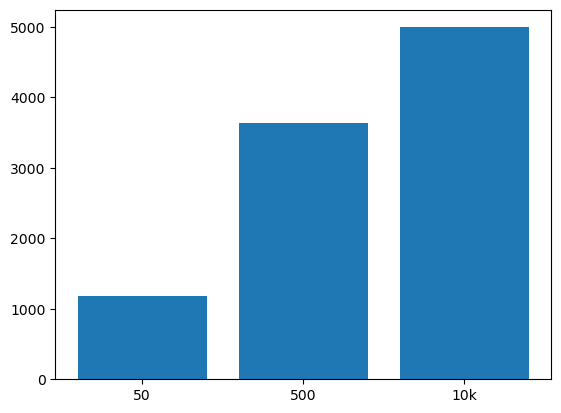

In [ ]:
def separation_scores(df_overlaps, groups=("50","500","10k"), threshold=0.1):int50
    """
    Compute separation scores for each image within each photon group.
    A score = number of other images in the same group where IoU <= threshold.
    
    Returns: dict mapping group -> DataFrame with columns [Index, Score]
    """
    scores_per_group = {}

    for group in groups:
        group_str = str(group)

        # select only overlaps within this group
        within_group = df_overlaps[
            (df_overlaps["GroupA"]==group_str) & (df_overlaps["GroupB"]==group_str)
        ]

        # all unique indices in this group
        indices = pd.unique(within_group[["IndexA","IndexB"]].values.ravel())

        #actually change to all groups?
        indices = pd.unique(df_overlaps[["IndexA","IndexB"]].values.ravel())
        score_dict = {idx: 0 for idx in indices}

        # iterate over overlaps
        for _, row in within_group.iterrows():
            idxA, idxB, iou = row["IndexA"], row["IndexB"], row["IoU"]
            if iou <= threshold:   # counts as "separated"
                score_dict[idxA] += 1
                score_dict[idxB] += 1

        # build dataframe of scores
        scores_df = pd.DataFrame(list(score_dict.items()), columns=["Index","Score"])
        scores_per_group[group] = scores_df

    return scores_per_group
scores = separation_scores(df_overlaps, threshold=0.1)

print("Scores for group 50:")
print(scores["50"].values[:,1])

print("Scores for group 500:")
print(scores["500"].values[:,1])

print("Scores for group 10k:")
print(scores["10k"].values[:,1])

plt.bar(['50','500','10k'], [np.sum(scores["50"].values[:,1]),np.sum(scores["500"].values[:,1]),np.sum(scores["10k"].values[:,1])])

      t1   t2   a1   a2       cvG      cvS photons  \
256  2.0  0.5  0.5  0.5  0.006729  0.00912   10000   

                                                 dataG  \
256  [[0.72353612973092], [0.723611916441618], [0.7...   

                                                 dataS  
256  [[0.367900565680226], [0.364463975673955], [0....  
                   t1   t2   a1   a2       cvG       cvS photons  \
55  6.349604207872796  0.5  0.5  0.5  0.012496  0.018183   10000   

                                                dataG  \
55  [[0.555603380068623], [0.548720121930259], [0....   

                                                dataS  
55  [[0.260413345140709], [0.261381053614791], [0....  
[0.72296921] [0.35800893] [0.54992376] [0.25606485]
[0.20084154] [0.20388947] [0.20384451]


<BarContainer object of 3 artists>

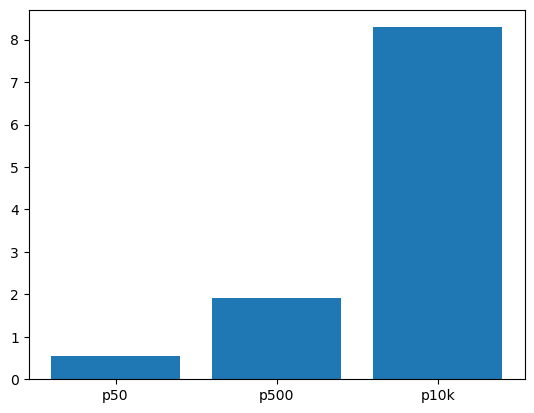

In [225]:
from phasorpy.plot import PhasorPlot
from matplotlib.colors import ListedColormap

short50 = df[(df['a1'] == '0.5') & (df['a2'] == '0.5')& (df['t2']=='0.5')& (df['t1']=='2.0')& (df['photons']=='50')]
short500 = df[(df['a1'] == '0.5') & (df['a2'] == '0.5')& (df['t2']=='0.5')& (df['t1']=='2.0')& (df['photons']=='500')]
short10k = df[(df['a1'] == '0.5') & (df['a2'] == '0.5')& (df['t2']=='0.5')& (df['t1']=='2.0')& (df['photons']==10000)]
#print(df[(df['t2']=='0.5')&(df['photons']==10000)&(df['a1'] == '0.5') & (df['a2'] == '0.5')])

print(short10k)
long50 =  df[(df['a1'] == '0.5') & (df['a2'] == '0.5')& (df['t2']=='0.5')& (df['t1']=='6.35')& (df['photons']=='50')]
long500 = df[(df['a1'] == '0.5') & (df['a2'] == '0.5')& (df['t2']=='0.5')& (df['t1']=='6.35')& (df['photons']=='500')]
long10k = df[(df['a1'] == '0.5') & (df['a2'] == '0.5')& (df['t2']=='0.5')& (df['t1']=='6.349604207872796')& (df['photons']==10000)]
print(long10k)
short50g = (np.mean(short50['dataG'].explode().to_numpy()))
short50s = (np.mean(short50['dataS'].explode().to_numpy()))

long50g = (np.mean(long50['dataG'].explode().to_numpy()))
long50s = (np.mean(long50['dataS'].explode().to_numpy()))

d50 = np.sqrt((short50g-long50g)**2+(short50s-long50s)**2)

short500g = (np.mean(short500['dataG'].explode().to_numpy()))
short500s = (np.mean(short500['dataS'].explode().to_numpy()))

long500g = (np.mean(long500['dataG'].explode().to_numpy()))
long500s = (np.mean(long500['dataS'].explode().to_numpy()))

d500 = np.sqrt((short500g-long500g)**2+(short500s-long500s)**2)

short10kg = (np.mean(short10k['dataG'].explode().to_numpy()))
short10ks = (np.mean(short10k['dataS'].explode().to_numpy()))

long10kg = (np.mean(long10k['dataG'].explode().to_numpy()))
long10ks = (np.mean(long10k['dataS'].explode().to_numpy()))

d10k = np.sqrt((short10kg-long10kg)**2+(short10ks-long10ks)**2)
print(short50g,short50s,long50g,long50s)

print(d50,d500,d10k)

hulls50s  = convex_hulls(short50, "50")
hulls500s = convex_hulls(short500, "500")
hulls10ks = convex_hulls(short10k, 10000)

hulls50l  = convex_hulls(long50, "50")
hulls500l = convex_hulls(long500, "500")
hulls10kl = convex_hulls(long10k, 10000)

dia50 = ((2*np.sqrt(hulls50s[0][2].area/3.14)) + (2*np.sqrt(hulls50l[0][2].area/3.14)))/2
dia500 = ((2*np.sqrt(hulls500s[0][2].area/3.14)) + (2*np.sqrt(hulls500l[0][2].area/3.14)))/2
dia10k = ((2*np.sqrt(hulls10ks[0][2].area/3.14)) + (2*np.sqrt(hulls10kl[0][2].area/3.14)))/2

plt.bar(['p50','p500','p10k'],[0.20084154/dia50, 0.20388947/dia500 ,0.20384451/dia10k]) #divide by convex hull area

#int50g = int50.loc[:,'dataG'].explode().to_numpy()


In [224]:

print(hulls10kl[0][2].area)


0.000691945708305071
